Analysis of the results computed in 'Learning rate gridsearch and training' notebook.  

Displays layer rotation curves and test accuracies for different learning rate values, using vanilla SGD (without weight decay) for training.

In [1]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()

%load_ext autoreload

In [2]:
%autoreload
import sys
sys.path.insert(0, "../")

import pickle
import math as m
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import numbers

from experiment_utils import plot_history, compare_histories
from layer_rotation_utils import plot_layer_rotation_curves

Using TensorFlow backend.


In [3]:
# utilities for storing the results in pickle files
result_file = 'results_lr_gridsearch.p'
with open(result_file,'rb') as f:
    results = pickle.load(f)

In [4]:
# test accuracies obtained with Layca's best configuration
ref_performances = {'C10-CNN1':0.8845,'C100-resnet':0.5981,'tiny-CNN':0.5089,'C10-CNN2':0.934,'C100-WRN':0.8069}

In [5]:
mpld3.disable_notebook()

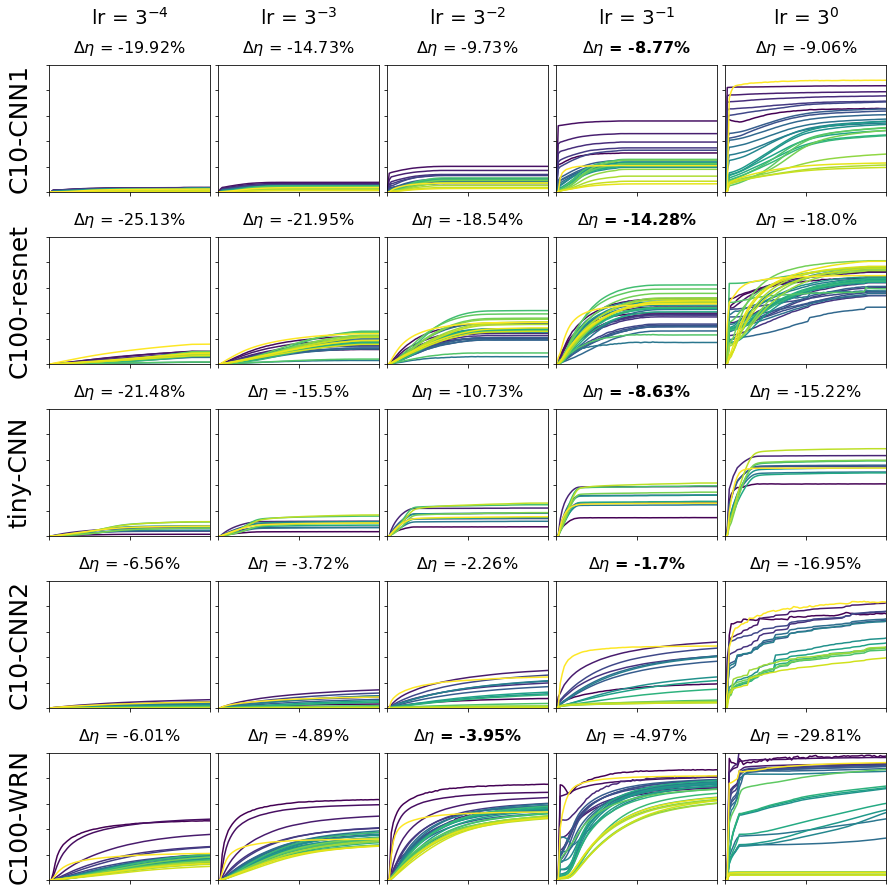

In [9]:
tasks = ['C10-CNN1','C100-resnet','tiny-CNN', 'C10-CNN2', 'C100-WRN']
#lrs = sorted([value for value in results[tasks[0]]['SGD'].keys() if isinstance(value, numbers.Number)])
lrs = sorted([3.**(-i) for i in range(0,5)])

f, axes = plt.subplots(len(tasks),len(lrs), figsize = (3*len(lrs),3*len(tasks)))
for j,task in enumerate(tasks):
    for i,lr in enumerate(lrs):
        ref_performance = ref_performances[task]
        plot_layer_rotation_curves(results[task]['SGD'][lr]['ladc'],ax = axes[j,i])

        if (lr == 3**-1 and task != 'C100-WRN') or (lr == 3**-2 and task == 'C100-WRN'):
            axes[j,i].set_title('$\Delta \eta$ = '+str(round((results[task]['SGD'][lr]['test_performance'][1]-ref_performance)*100,2))+'%',fontsize=16,fontweight='bold', y=1.05)
#         elif results[task]['SGD'][lr]['history']['history']['acc'][-1]<0.9:
#             axes[j,i].set_title('Training fails',fontsize=16, y=1.05)
        else:
            axes[j,i].set_title('$\Delta \eta$ = '+str(round((results[task]['SGD'][lr]['test_performance'][1]-ref_performance)*100,2))+'%',fontsize=16, y=1.05)        

        axes[j,i].set_xlabel('')
        axes[j,i].set_ylabel('')
        axes[j,i].set_xticklabels('')
        axes[j,i].set_yticklabels('')
        axes[j,i].set_xlim([0,80])
        axes[j,i].set_xticks([0,40,80]) 

    pad = 3
    axes[j,0].annotate(task, xy=(0, 0.5), xytext=(-axes[j,0].yaxis.labelpad - pad, 0),
                xycoords=axes[j,0].yaxis.label, textcoords='offset points',
                size=25, ha='right', va='center',rotation=90)

for j in range(len(lrs)):
    pad = 40
    size = 20
    axes[0,j].annotate('lr = $3^{'+str(int(m.log(lrs[j],3)))+'}$', xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size=size, ha='center', va='baseline')

plt.subplots_adjust(hspace=0.35,wspace=0.05)
plt.savefig('figures/lr_analysis_curves.png',format='png', dpi=200, bbox_inches="tight")

In [10]:
# Training accuracies for each layer rotation curves visualization above

tasks = ['C10-CNN1','C100-resnet','tiny-CNN','C10-CNN2','C100-WRN']

for task in tasks:
    performances = []
    for lr in lrs:
        performances.append(round(results[task]['SGD'][lr]['history']['history']['acc'][-1],3))
    print(performances)

[1.0, 1.0, 1.0, 1.0, 1.0]
[0.878, 1.0, 1.0, 1.0, 0.997]
[1.0, 1.0, 1.0, 1.0, 1.0]
[0.998, 0.999, 1.0, 1.0, 0.837]
[1.0, 1.0, 1.0, 1.0, 0.574]
